In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [2]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raviranjan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Loading dataset containing tweet body collected by get-tweets.py file
def load_data():
    data = pd.read_csv('trump.csv')
    return data

In [4]:
trump_tweets = load_data()
trump_tweets.head()

,date,tweet_body
0,2022-12-12 01:46:12+00:00,b'RT @RBReich: Reminder: any lawmakers who engaged in insurrection on January 6th must be held a...
1,2022-12-12 01:46:09+00:00,b'RT @NickAdamsinUSA: People forget that Donald Trump never took a salary while serving as our C...
2,2022-12-12 01:46:09+00:00,"b'@miguelcgangel Clon de Donald Trump si quieren, pero espero que lo'"
3,2022-12-12 01:46:07+00:00,b'RT @ericareport: BREAKING! Former United States Attorney Barbara McQuade says that there is en...
4,2022-12-12 01:46:05+00:00,b'@OccupyDemocrats Violent criminal Donald Trump incited violence against U.S. Law Enforcement a...


In [5]:
print('Shape of Dataset:',trump_tweets.shape)
print('Columns of Dataset',trump_tweets.columns)

Shape of Dataset: (17811, 2)
Columns of Dataset Index(['date', 'tweet_body'], dtype='object')


In [6]:
trump_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17811 entries, 0 to 17810
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        17811 non-null  object
 1   tweet_body  17811 non-null  object
dtypes: object(2)
memory usage: 278.4+ KB


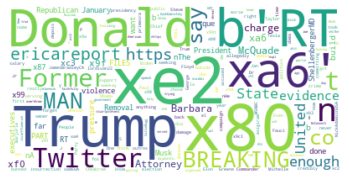

In [7]:
# Generating Word Cloud to see the keywords

tweet_main_body = " ".join(review for review in trump_tweets.tweet_body)

tweets_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(tweet_main_body)

# Display the generated Word Cloud

plt.imshow(tweets_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Data preprocessing 

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

trump_tweets['tweet_punct'] = trump_tweets['tweet_body'].apply(lambda x: remove_punctuation(x))
trump_tweets.head(10)

,date,tweet_body,tweet_punct
0,2022-12-12 01:46:12+00:00,b'RT @RBReich: Reminder: any lawmakers who engaged in insurrection on January 6th must be held a...,bRT RBReich Reminder any lawmakers who engaged in insurrection on January th must be held accoun...
1,2022-12-12 01:46:09+00:00,b'RT @NickAdamsinUSA: People forget that Donald Trump never took a salary while serving as our C...,bRT NickAdamsinUSA People forget that Donald Trump never took a salary while serving as our Comm...
2,2022-12-12 01:46:09+00:00,"b'@miguelcgangel Clon de Donald Trump si quieren, pero espero que lo'",bmiguelcgangel Clon de Donald Trump si quieren pero espero que lo
3,2022-12-12 01:46:07+00:00,b'RT @ericareport: BREAKING! Former United States Attorney Barbara McQuade says that there is en...,bRT ericareport BREAKING Former United States Attorney Barbara McQuade says that there is enough...
4,2022-12-12 01:46:05+00:00,b'@OccupyDemocrats Violent criminal Donald Trump incited violence against U.S. Law Enforcement a...,bOccupyDemocrats Violent criminal Donald Trump incited violence against US Law Enforcement and U...
5,2022-12-12 01:46:04+00:00,b'https://t.co/sGhk46nqrW',bhttpstcosGhknqrW
6,2022-12-12 01:46:04+00:00,"b'Donald Trump\xe2\x80\x99s niece calls him \xe2\x80\x98a black hole of need\xe2\x80\x99, says R...",bDonald Trumpxexxs niece calls him xexxa black hole of needxexx says Republicans see him as xexx...
7,2022-12-12 01:46:02+00:00,"b'GOD Bless T H E PRESIDENT OF THE US, DONALD J TRUMP https://t.co/uLCW4azxZJ'",bGOD Bless T H E PRESIDENT OF THE US DONALD J TRUMP httpstcouLCWazxZJ
8,2022-12-12 01:46:02+00:00,b'RT @coleyshannon66: @jim_enloe @ShellenbergerMD The insurrection without weapons? The insurrec...,bRT coleyshannon jimenloe ShellenbergerMD The insurrection without weapons The insurrection wher...
9,2022-12-12 01:45:59+00:00,"b""RT @tribelaw: \xe2\x80\x9cMitt Romney is the first Republican senator to say he won't support ...",bRT tribelaw xexxcMitt Romney is the first Republican senator to say he wont support Donald Trum...


In [10]:
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

trump_tweets['tweet_tokenized'] = trump_tweets['tweet_punct'].apply(lambda x: tokenization(x.lower()))
trump_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized
0,2022-12-12 01:46:12+00:00,b'RT @RBReich: Reminder: any lawmakers who engaged in insurrection on January 6th must be held a...,bRT RBReich Reminder any lawmakers who engaged in insurrection on January th must be held accoun...,"[brt, rbreich, reminder, any, lawmakers, who, engaged, in, insurrection, on, january, th, must, ..."
1,2022-12-12 01:46:09+00:00,b'RT @NickAdamsinUSA: People forget that Donald Trump never took a salary while serving as our C...,bRT NickAdamsinUSA People forget that Donald Trump never took a salary while serving as our Comm...,"[brt, nickadamsinusa, people, forget, that, donald, trump, never, took, a, salary, while, servin..."
2,2022-12-12 01:46:09+00:00,"b'@miguelcgangel Clon de Donald Trump si quieren, pero espero que lo'",bmiguelcgangel Clon de Donald Trump si quieren pero espero que lo,"[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]"
3,2022-12-12 01:46:07+00:00,b'RT @ericareport: BREAKING! Former United States Attorney Barbara McQuade says that there is en...,bRT ericareport BREAKING Former United States Attorney Barbara McQuade says that there is enough...,"[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, that, the..."
4,2022-12-12 01:46:05+00:00,b'@OccupyDemocrats Violent criminal Donald Trump incited violence against U.S. Law Enforcement a...,bOccupyDemocrats Violent criminal Donald Trump incited violence against US Law Enforcement and U...,"[boccupydemocrats, violent, criminal, donald, trump, incited, violence, against, us, law, enforc..."


Removing stop words 

In [11]:
stopword = nltk.corpus.stopwords.words('english')

In [12]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
trump_tweets['tweet_nonstop'] = trump_tweets['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
trump_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop
0,2022-12-12 01:46:12+00:00,b'RT @RBReich: Reminder: any lawmakers who engaged in insurrection on January 6th must be held a...,bRT RBReich Reminder any lawmakers who engaged in insurrection on January th must be held accoun...,"[brt, rbreich, reminder, any, lawmakers, who, engaged, in, insurrection, on, january, th, must, ...","[brt, rbreich, reminder, lawmakers, engaged, insurrection, january, th, must, held, accountable,..."
1,2022-12-12 01:46:09+00:00,b'RT @NickAdamsinUSA: People forget that Donald Trump never took a salary while serving as our C...,bRT NickAdamsinUSA People forget that Donald Trump never took a salary while serving as our Comm...,"[brt, nickadamsinusa, people, forget, that, donald, trump, never, took, a, salary, while, servin...","[brt, nickadamsinusa, people, forget, donald, trump, never, took, salary, serving, commander, ch..."
2,2022-12-12 01:46:09+00:00,"b'@miguelcgangel Clon de Donald Trump si quieren, pero espero que lo'",bmiguelcgangel Clon de Donald Trump si quieren pero espero que lo,"[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]"
3,2022-12-12 01:46:07+00:00,b'RT @ericareport: BREAKING! Former United States Attorney Barbara McQuade says that there is en...,bRT ericareport BREAKING Former United States Attorney Barbara McQuade says that there is enough...,"[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, that, the...","[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, enough, e..."
4,2022-12-12 01:46:05+00:00,b'@OccupyDemocrats Violent criminal Donald Trump incited violence against U.S. Law Enforcement a...,bOccupyDemocrats Violent criminal Donald Trump incited violence against US Law Enforcement and U...,"[boccupydemocrats, violent, criminal, donald, trump, incited, violence, against, us, law, enforc...","[boccupydemocrats, violent, criminal, donald, trump, incited, violence, us, law, enforcement, us..."


Lammitization after stopwords

In [13]:
portStem = nltk.PorterStemmer()

def stemming(text):
    text = [portStem.stem(word) for word in text]
    return text

trump_tweets['tweet_stemmed'] = trump_tweets['tweet_nonstop'].apply(lambda x: stemming(x))
trump_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed
0,2022-12-12 01:46:12+00:00,b'RT @RBReich: Reminder: any lawmakers who engaged in insurrection on January 6th must be held a...,bRT RBReich Reminder any lawmakers who engaged in insurrection on January th must be held accoun...,"[brt, rbreich, reminder, any, lawmakers, who, engaged, in, insurrection, on, january, th, must, ...","[brt, rbreich, reminder, lawmakers, engaged, insurrection, january, th, must, held, accountable,...","[brt, rbreich, remind, lawmak, engag, insurrect, januari, th, must, held, account, bar, hold, pu..."
1,2022-12-12 01:46:09+00:00,b'RT @NickAdamsinUSA: People forget that Donald Trump never took a salary while serving as our C...,bRT NickAdamsinUSA People forget that Donald Trump never took a salary while serving as our Comm...,"[brt, nickadamsinusa, people, forget, that, donald, trump, never, took, a, salary, while, servin...","[brt, nickadamsinusa, people, forget, donald, trump, never, took, salary, serving, commander, ch...","[brt, nickadamsinusa, peopl, forget, donald, trump, never, took, salari, serv, command, chief]"
2,2022-12-12 01:46:09+00:00,"b'@miguelcgangel Clon de Donald Trump si quieren, pero espero que lo'",bmiguelcgangel Clon de Donald Trump si quieren pero espero que lo,"[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]"
3,2022-12-12 01:46:07+00:00,b'RT @ericareport: BREAKING! Former United States Attorney Barbara McQuade says that there is en...,bRT ericareport BREAKING Former United States Attorney Barbara McQuade says that there is enough...,"[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, that, the...","[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, enough, e...","[brt, ericareport, break, former, unit, state, attorney, barbara, mcquad, say, enough, evid, cha..."
4,2022-12-12 01:46:05+00:00,b'@OccupyDemocrats Violent criminal Donald Trump incited violence against U.S. Law Enforcement a...,bOccupyDemocrats Violent criminal Donald Trump incited violence against US Law Enforcement and U...,"[boccupydemocrats, violent, criminal, donald, trump, incited, violence, against, us, law, enforc...","[boccupydemocrats, violent, criminal, donald, trump, incited, violence, us, law, enforcement, us...","[boccupydemocrat, violent, crimin, donald, trump, incit, violenc, us, law, enforc, us, lawmak, o..."


In [14]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

trump_tweets['tweet_lemmatized'] = trump_tweets['tweet_nonstop'].apply(lambda x: lemmatizer(x))
trump_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized
0,2022-12-12 01:46:12+00:00,b'RT @RBReich: Reminder: any lawmakers who engaged in insurrection on January 6th must be held a...,bRT RBReich Reminder any lawmakers who engaged in insurrection on January th must be held accoun...,"[brt, rbreich, reminder, any, lawmakers, who, engaged, in, insurrection, on, january, th, must, ...","[brt, rbreich, reminder, lawmakers, engaged, insurrection, january, th, must, held, accountable,...","[brt, rbreich, remind, lawmak, engag, insurrect, januari, th, must, held, account, bar, hold, pu...","[brt, rbreich, reminder, lawmaker, engaged, insurrection, january, th, must, held, accountable, ..."
1,2022-12-12 01:46:09+00:00,b'RT @NickAdamsinUSA: People forget that Donald Trump never took a salary while serving as our C...,bRT NickAdamsinUSA People forget that Donald Trump never took a salary while serving as our Comm...,"[brt, nickadamsinusa, people, forget, that, donald, trump, never, took, a, salary, while, servin...","[brt, nickadamsinusa, people, forget, donald, trump, never, took, salary, serving, commander, ch...","[brt, nickadamsinusa, peopl, forget, donald, trump, never, took, salari, serv, command, chief]","[brt, nickadamsinusa, people, forget, donald, trump, never, took, salary, serving, commander, ch..."
2,2022-12-12 01:46:09+00:00,"b'@miguelcgangel Clon de Donald Trump si quieren, pero espero que lo'",bmiguelcgangel Clon de Donald Trump si quieren pero espero que lo,"[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]"
3,2022-12-12 01:46:07+00:00,b'RT @ericareport: BREAKING! Former United States Attorney Barbara McQuade says that there is en...,bRT ericareport BREAKING Former United States Attorney Barbara McQuade says that there is enough...,"[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, that, the...","[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, enough, e...","[brt, ericareport, break, former, unit, state, attorney, barbara, mcquad, say, enough, evid, cha...","[brt, ericareport, breaking, former, united, state, attorney, barbara, mcquade, say, enough, evi..."
4,2022-12-12 01:46:05+00:00,b'@OccupyDemocrats Violent criminal Donald Trump incited violence against U.S. Law Enforcement a...,bOccupyDemocrats Violent criminal Donald Trump incited violence against US Law Enforcement and U...,"[boccupydemocrats, violent, criminal, donald, trump, incited, violence, against, us, law, enforc...","[boccupydemocrats, violent, criminal, donald, trump, incited, violence, us, law, enforcement, us...","[boccupydemocrat, violent, crimin, donald, trump, incit, violenc, us, law, enforc, us, lawmak, o...","[boccupydemocrats, violent, criminal, donald, trump, incited, violence, u, law, enforcement, u, ..."


In [15]:
from textblob import TextBlob 

In [16]:
 #Creating a function to get the subjectivity
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Creating a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity

In [17]:
trump_tweets['polarity'] = trump_tweets.apply(lambda x: TextBlob(x['tweet_punct']).sentiment.polarity, axis=1)
trump_tweets['subjectivity'] = trump_tweets.apply(lambda x: TextBlob(x['tweet_punct']).sentiment.subjectivity, axis=1)

In [18]:
trump_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,polarity,subjectivity
0,2022-12-12 01:46:12+00:00,b'RT @RBReich: Reminder: any lawmakers who engaged in insurrection on January 6th must be held a...,bRT RBReich Reminder any lawmakers who engaged in insurrection on January th must be held accoun...,"[brt, rbreich, reminder, any, lawmakers, who, engaged, in, insurrection, on, january, th, must, ...","[brt, rbreich, reminder, lawmakers, engaged, insurrection, january, th, must, held, accountable,...","[brt, rbreich, remind, lawmak, engag, insurrect, januari, th, must, held, account, bar, hold, pu...","[brt, rbreich, reminder, lawmaker, engaged, insurrection, january, th, must, held, accountable, ...",0.0,0.066667
1,2022-12-12 01:46:09+00:00,b'RT @NickAdamsinUSA: People forget that Donald Trump never took a salary while serving as our C...,bRT NickAdamsinUSA People forget that Donald Trump never took a salary while serving as our Comm...,"[brt, nickadamsinusa, people, forget, that, donald, trump, never, took, a, salary, while, servin...","[brt, nickadamsinusa, people, forget, donald, trump, never, took, salary, serving, commander, ch...","[brt, nickadamsinusa, peopl, forget, donald, trump, never, took, salari, serv, command, chief]","[brt, nickadamsinusa, people, forget, donald, trump, never, took, salary, serving, commander, ch...",0.0,0.000000
2,2022-12-12 01:46:09+00:00,"b'@miguelcgangel Clon de Donald Trump si quieren, pero espero que lo'",bmiguelcgangel Clon de Donald Trump si quieren pero espero que lo,"[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]","[bmiguelcgangel, clon, de, donald, trump, si, quieren, pero, espero, que, lo]",0.0,0.000000
3,2022-12-12 01:46:07+00:00,b'RT @ericareport: BREAKING! Former United States Attorney Barbara McQuade says that there is en...,bRT ericareport BREAKING Former United States Attorney Barbara McQuade says that there is enough...,"[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, that, the...","[brt, ericareport, breaking, former, united, states, attorney, barbara, mcquade, says, enough, e...","[brt, ericareport, break, former, unit, state, attorney, barbara, mcquad, say, enough, evid, cha...","[brt, ericareport, breaking, former, united, state, attorney, barbara, mcquade, say, enough, evi...",0.0,0.250000
4,2022-12-12 01:46:05+00:00,b'@OccupyDemocrats Violent criminal Donald Trump incited violence against U.S. Law Enforcement a...,bOccupyDemocrats Violent criminal Donald Trump incited violence against US Law Enforcement and U...,"[boccupydemocrats, violent, criminal, donald, trump, incited, violence, against, us, law, enforc...","[boccupydemocrats, violent, criminal, donald, trump, incited, violence, us, law, enforcement, us...","[boccupydemocrat, violent, crimin, donald, trump, incit, violenc, us, law, enforc, us, lawmak, o...","[boccupydemocrats, violent, criminal, donald, trump, incited, violence, u, law, enforcement, u, ...",-0.6,0.775000


In [19]:

n=trump_tweets['polarity']

m=pd.Series(n)

m

0        0.0
1        0.0
2        0.0
3        0.0
4       -0.6
        ... 
17806    0.0
17807    0.0
17808    0.0
17809    0.0
17810    0.2
Name: polarity, Length: 17811, dtype: float64

In [20]:
# Initialing variables, 'positive as pos', 'Negative as neg'and 'Neutral as neu'.

pos=0
neg=0
neu=0


for items in m:
    if items>0:
        #print("Positive")
        pos=pos+1
    elif items<0:
        #print("Negative")
        neg=neg+1
    else:
        #print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

4477 2544 10790


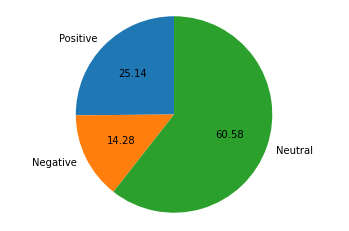

In [21]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

Similarity analysis using TDIDF Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow=CountVectorizer( min_df=2, max_features=1000)
bow.fit(trump_tweets['tweet_punct'])
bow_df=bow.transform(trump_tweets['tweet_punct']).toarray()

In [24]:
bow_df

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
import gensim
tokenize=trump_tweets['tweet_punct'].apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, window = 5, sg = 1)
w2vec_model.train(tokenize,total_examples= len(trump_tweets['tweet_punct']),epochs=20)

(5097118, 7101860)

5097098 data points of text is now converted to a 7101860-dimension vector each. 

In [26]:
print(w2vec_model)

Word2Vec<vocab=13437, vector_size=100, alpha=0.025>


In [27]:
from collections import Counter
Counter(" ".join(trump_tweets['tweet_punct']).split()).most_common(100)

[('bRT', 15179),
 ('Donald', 13068),
 ('Trump', 12610),
 ('the', 8611),
 ('to', 7274),
 ('is', 7055),
 ('that', 6378),
 ('of', 5607),
 ('a', 4814),
 ('and', 4278),
 ('with', 3887),
 ('BREAKING', 3502),
 ('there', 3287),
 ('ericareport', 3230),
 ('in', 3229),
 ('Twitter', 3058),
 ('Former', 3039),
 ('says', 3022),
 ('enough', 3006),
 ('United', 2969),
 ('States', 2968),
 ('evidence', 2947),
 ('charge', 2932),
 ('Attorney', 2927),
 ('McQuade', 2884),
 ('Barbara', 2882),
 ('MANxexxa', 2882),
 ('was', 2865),
 ('you', 1882),
 ('for', 1861),
 ('January', 1621),
 ('The', 1606),
 ('as', 1531),
 ('has', 1436),
 ('who', 1385),
 ('done', 1343),
 ('Removal', 1244),
 ('his', 1212),
 ('ShellenbergerMD', 1198),
 ('executives', 1171),
 ('he', 1160),
 ('President', 1087),
 ('thexexxa', 1080),
 ('FILES', 1021),
 ('nnThe', 1021),
 ('TWITTER', 1020),
 ('PART', 1016),
 ('pressure', 1012),
 ('builds', 1012),
 ('nnAs', 1011),
 ('build', 1010),
 ('I', 1002),
 ('by', 988),
 ('from', 966),
 ('que', 934),
 ('on'

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raviranjan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

               Frequency
Word                    
b'rt               13624
donald             13107
trump              10068
twitter             4200
former              3598
@ericareport:       3210
says                3033
enough              3004
states              2984
united              2971
evidence            2940
attorney            2933
charge              2931
breaking!           2896


<AxesSubplot:xlabel='Word'>

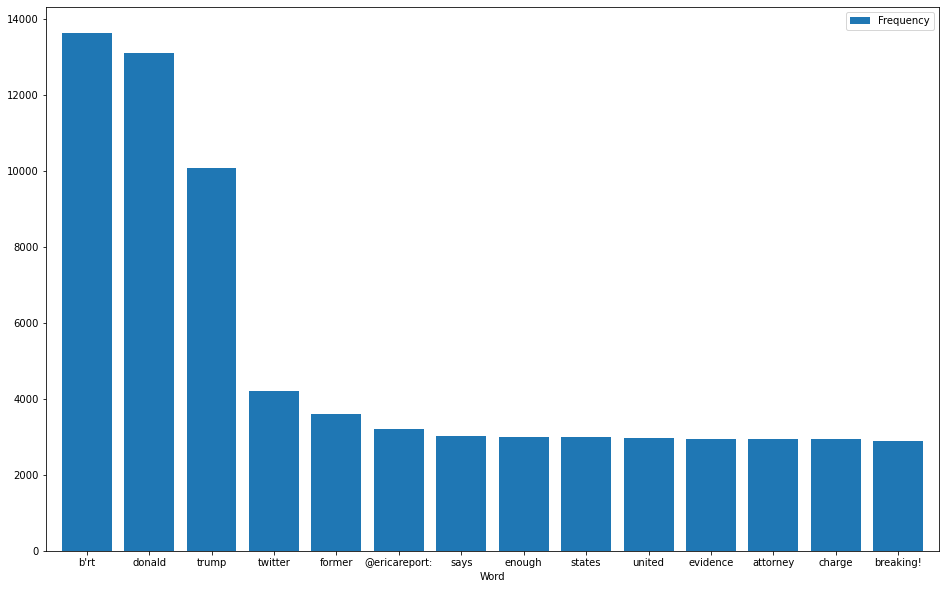

In [29]:


top_N = 14

df2 = pd.read_csv('trump.csv',
                 usecols=['tweet_body','tweet_body'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df2.tweet_body
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)